**INF2178 - Experimental Design for Data Science**

**Professor Shion Guha**

**Student Name - Fatima Ashfaq**

Student ID - 1010784732

Program - MI/HCDS

University of Toronto

Date Created - 22 January 2024

Date Modified - 2 February 2024

**URL Link to Report/Narrative:**

https://docs.google.com/document/d/1zvaMa2H7b9EcRvMuICnN8cMKsTq2WVg9yK4hhWYAxTs/edit?usp=sharing

**URL Link to Google Colab Code .ipynb File:**

https://colab.research.google.com/drive/1SvhfebCjqxz9A_E4LeaVKlwGxHhXyy42?usp=sharing

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import mstats #imported to winsorise the outliers

In [ ]:
#Reading the data into a data frame
df = pd.read_excel('/drive/MyDrive/INF2178/INF2178_A1.xlsx')
df.head(10)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN
6,2021-01-01,COSTI Immigrant Services,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,120,Room Based Capacity,NaN,NaN,46.0,44.0
7,2021-01-01,COSTI Immigrant Services,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,130,Room Based Capacity,NaN,NaN,46.0,44.0
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,NaN,NaN,145.0,145.0
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0


In [ ]:
# Converting occupancy_date to datetime format
df["OCCUPANCY_DATE"] = pd.to_datetime(df["OCCUPANCY_DATE"], format="%m/%d/%Y")

In [ ]:
#Drop unnecessary columns
dropped_columns = ["PROGRAM_ID", "SECTOR"]
df = df.drop(columns=dropped_columns)
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_NAME,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,COSTI North York West Hotel - Family Program,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,COSTI North York West Hotel - Seniors Program,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,COSTI North York West Hotel Program - Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,COSTI North York West Hotel Program - Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,COSTI North York West Hotel Program - Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


# Exploratory Data Analysis (EDA)

**Non-Graphical EDA**

In [ ]:
#Initial Descriptive Statistics - Non-Graphical EDA
df.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598
std,53.326049,27.127682,26.379416,59.448805,58.792954
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,15.000000,14.000000,19.000000,16.000000
50%,28.000000,25.000000,23.000000,35.000000,34.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000


In [ ]:
def get_summary_statistics(df):

  mean = np.round(np.mean(df), 2)
  median = np.round(np.median(df), 2)
  min_value = np.round(df.min(), 2)
  max_value = np.round(df.max(), 2)

  print('Min: ', min_value)
  print('Max: ', max_value)
  print('Median: ', median)
  print('Mean: ', mean)

In [ ]:
get_summary_statistics(df.SERVICE_USER_COUNT)

Min:  1
Max:  339
Median:  28.0
Mean:  45.73


In [ ]:
#Since there are several null values in the occupied beds variable of the dataset, it is best to proceed with the visualisations and the statistical calculations using the service_user_count variable as has no null values.
get_summary_statistics(df.OCCUPIED_BEDS)

Min:  1.0
Max:  234.0
Median:  nan
Mean:  29.78


In [ ]:
#Checking for missing/null values
null_values = df.isnull().sum()
null_values

OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_NAME                 35
PROGRAM_MODEL                 2
OVERNIGHT_SERVICE_TYPE        2
PROGRAM_AREA                  2
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18545
OCCUPIED_BEDS             18545
CAPACITY_ACTUAL_ROOM      32399
OCCUPIED_ROOMS            32399
dtype: int64

**Graphical EDA**

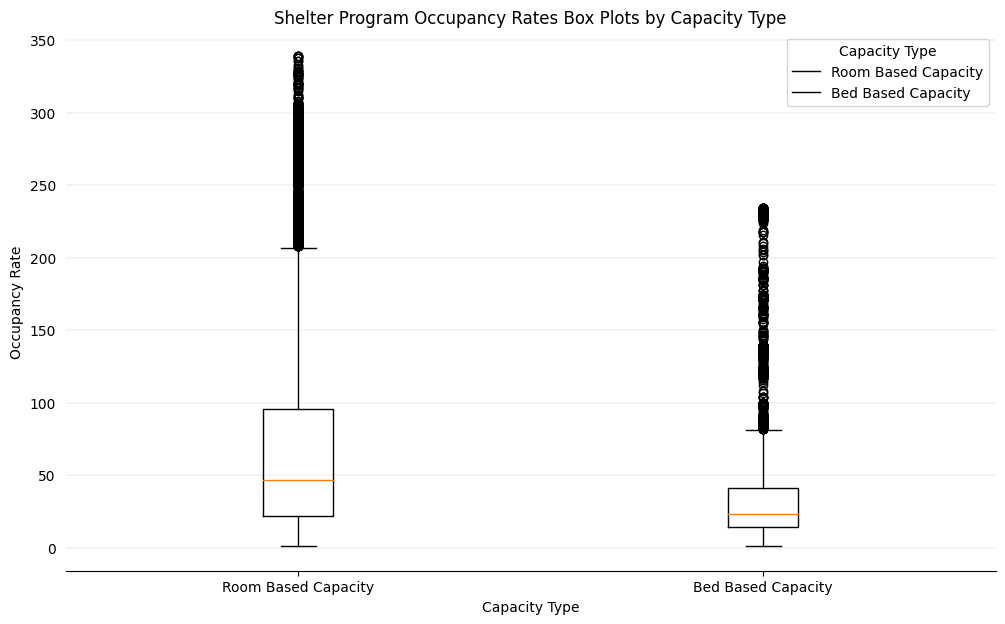

In [ ]:
# Visualisation 1 - Boxplot (Shelter Program Occupancy Rates Box Plots by Capacity Type)
#This first visualisation aims to highlight outliers if present and determine if the capacity types follow a similar/identical variance pattern

#Creation and calculation of Shelter Program Occupancy Rates variable
df["OCCUPANCY_RATE"] = np.where(df["CAPACITY_ACTUAL_BED"] != 0, df["SERVICE_USER_COUNT"] / df["CAPACITY_ACTUAL_BED"], 0)

#BoxPlot generation
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none')

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Shelter Program Occupancy Rates Box Plots by Capacity Type')

boxplot_data = [df[df['CAPACITY_TYPE'] == category]['SERVICE_USER_COUNT'].dropna().values for category in df['CAPACITY_TYPE'].unique()]

labels = df['CAPACITY_TYPE'].unique()

ax.boxplot(boxplot_data, labels=labels)

ax.set_xlabel('Capacity Type')
ax.set_ylabel('Occupancy Rate')
ax.legend(labels, title='Capacity Type')

plt.show()

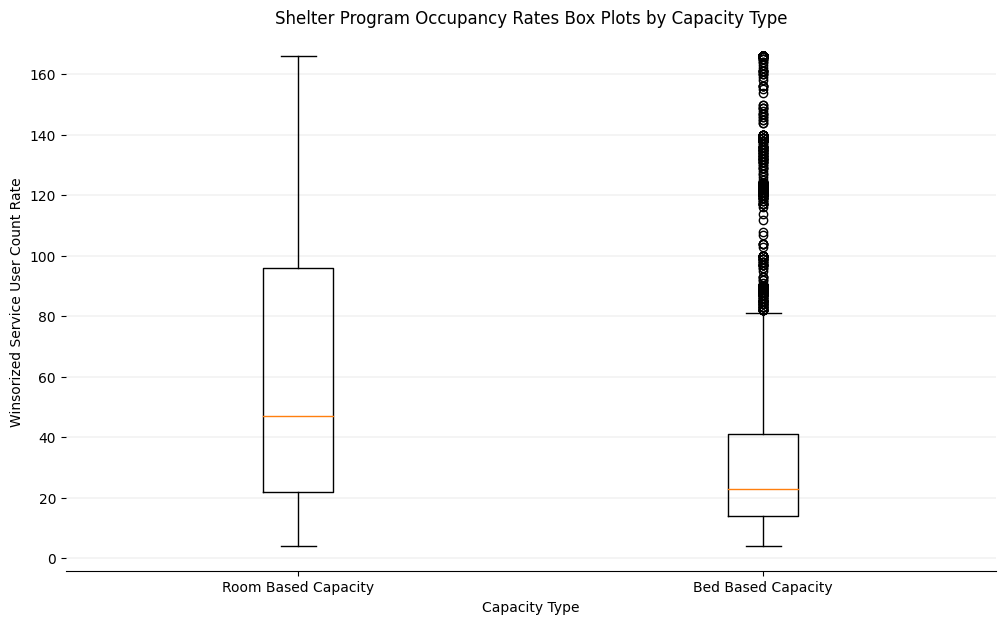

In [ ]:
#Visualisation 2 - Boxplot 2
#This boxplot is generated to winsorize the outliers detected in the first boxplot

#Winsorizing the Occupancy Rate to address the outliers present
df['Service_User_Count_Winsorized'] = mstats.winsorize(df['SERVICE_USER_COUNT'], limits=[0.05, 0.05])

#Boxplot generation
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Shelter Program Occupancy Rates Box Plots by Capacity Type')

boxplot_data = [df[df['CAPACITY_TYPE'] == category]['Service_User_Count_Winsorized'].dropna().values for category in df['CAPACITY_TYPE'].unique()]

labels = df['CAPACITY_TYPE'].unique()

ax.boxplot(boxplot_data, labels=labels)

ax.set_xlabel('Capacity Type')
ax.set_ylabel('Winsorized Service User Count Rate')

plt.show()



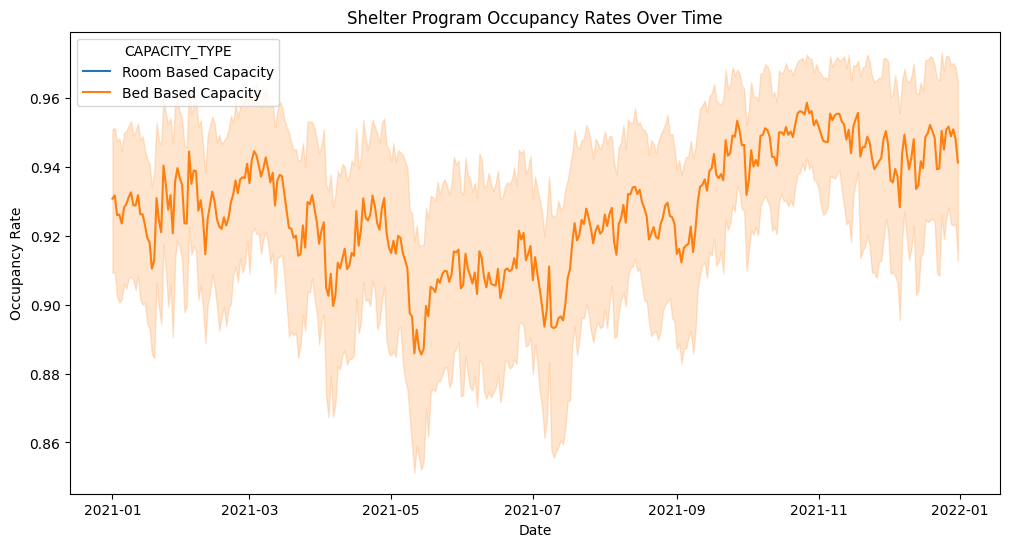

In [ ]:
#Visualisation 3 - Time Series Analysis
#This line/trend plot aims to display the shelter program occupancy rates over time.
plt.figure(figsize=(12, 6))
sns.lineplot(x="OCCUPANCY_DATE", y="OCCUPANCY_RATE", hue= "CAPACITY_TYPE", data=df)
plt.title("Shelter Program Occupancy Rates Over Time")
plt.xlabel("Date")
plt.ylabel("Occupancy Rate")
plt.legend(title= "CAPACITY_TYPE")
plt.show()

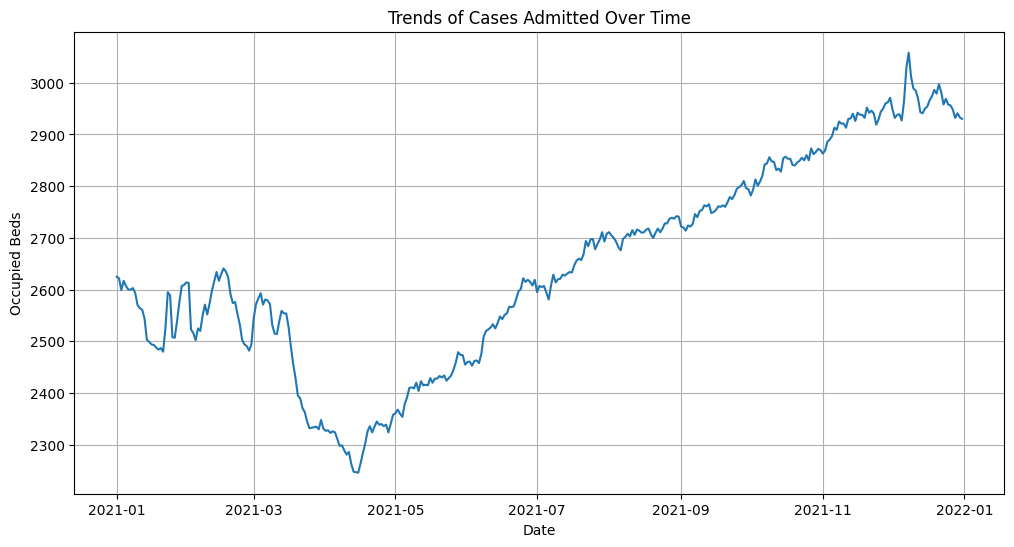

In [ ]:
#Visualisation 4 - Time-series Plot
#This line graph aims to see the trends over time in the daily admissions in the shelter program

daily_admissions = df.groupby('OCCUPANCY_DATE')['OCCUPIED_BEDS'].sum().reset_index()

#Line plot generation
plt.figure(figsize=(12, 6))
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPIED_BEDS', data=daily_admissions)
plt.title('Trends of Cases Admitted Over Time')
plt.xlabel('Date')
plt.ylabel('Occupied Beds')
plt.grid(True)
plt.show()

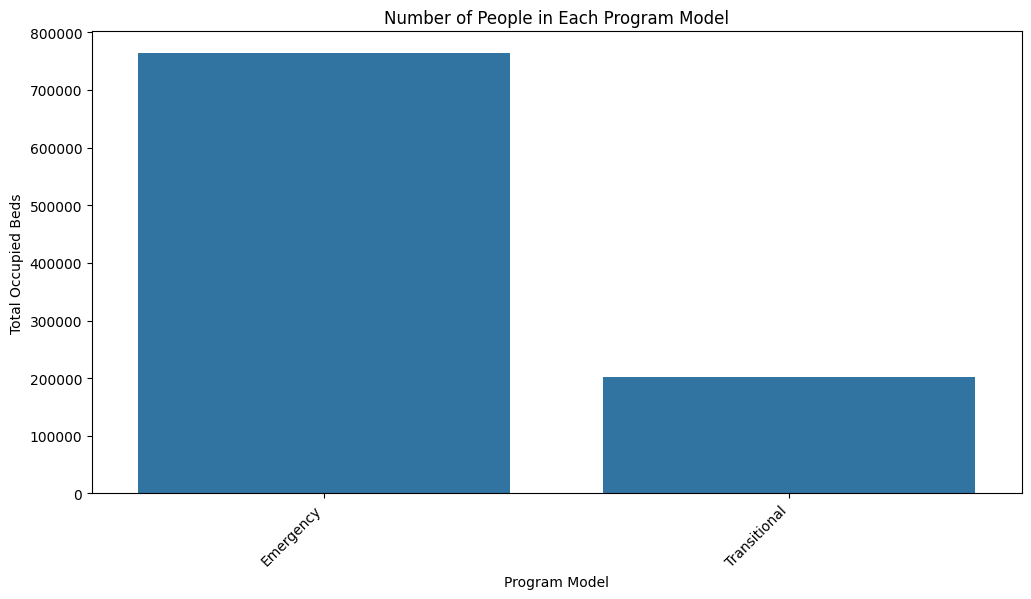

In [ ]:
#Visualisation 5 - Barplot
#This visualisation aims to visualise the overall trend of admissions in the two program models (Emergency and Transitional programs) with the help of a barplot as we are dealing with categorical data.
program_model_counts = df.groupby('PROGRAM_MODEL')['OCCUPIED_BEDS'].sum().reset_index()

#Barplot generation
plt.figure(figsize=(12, 6))
sns.barplot(x='PROGRAM_MODEL', y='OCCUPIED_BEDS', data=program_model_counts)
plt.title('Number of People in Each Program Model')
plt.xlabel('Program Model')
plt.ylabel('Total Occupied Beds')
plt.xticks(rotation=45, ha='right')
plt.show()

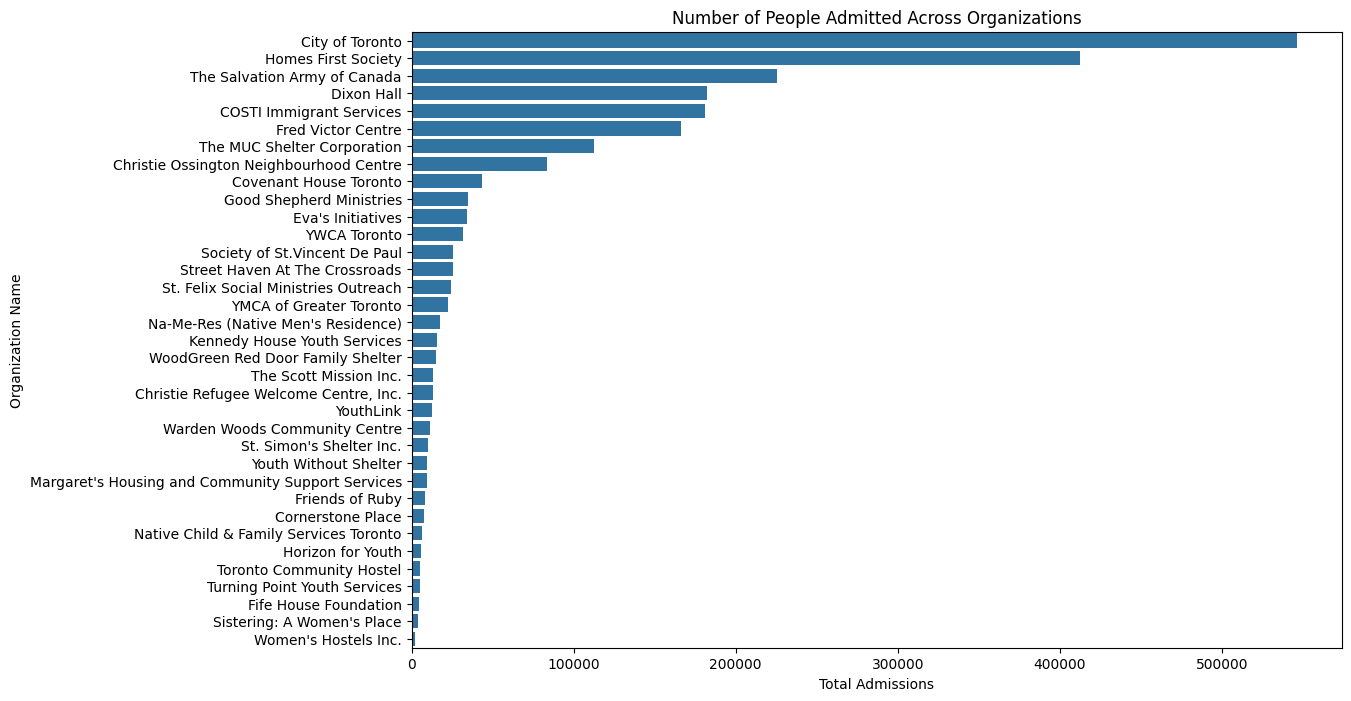

In [ ]:
#Visualisation 6 - Barplot
#This barplot aims to highlight the admittance across the different shelter organisations.
organization_counts = df.groupby('ORGANIZATION_NAME')['SERVICE_USER_COUNT'].sum().reset_index()

# Sorting the data frame by the occupied beds variable in descending order to highlight the organisations with the highest admissions.
organization_counts = organization_counts.sort_values(by='SERVICE_USER_COUNT', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='SERVICE_USER_COUNT', y='ORGANIZATION_NAME', data=organization_counts)
plt.title('Number of People Admitted Across Organizations')
plt.xlabel('Total Admissions')
plt.ylabel('Organization Name')
plt.show()


# Using T-Tests To Answer Research Questions

**Occupancy Trends by Program Model:**

Research Question: Do the different program models show significant differences in occupancy rates?

Null Hypothesis (H0): There is no significant difference in occupancy rates across program models.

Alternative Hypothesis (H1): There is a significant difference in occupancy rates across program models.

In [ ]:
#Data for Welch's T-test
model1 = df[df['PROGRAM_MODEL'] == 'Emergency']['OCCUPIED_BEDS'].dropna()
model2 = df[df['PROGRAM_MODEL'] == 'Transitional']['OCCUPIED_BEDS'].dropna()

# Perform Levene's test for equality of variances
levenes_median = stats.levene(model1, model2, center= 'median')
print("Levene's test for equality of variances:")
print("T-statistics= ",levenes_median.statistic)
print("P-value =", levenes_median.pvalue)
print()

# Perform Welch's T-test
t_stat, p_val = stats.ttest_ind(model1, model2, equal_var=False)

# Print results
print("Welch's T-test results for Program Models:")
print("T-statistic:", t_stat)
print("P-value:", p_val)


Levene's test for equality of variances:
T-statistics=  506.4029672064086
P-value = 2.7468122789149392e-111

Welch's T-test results for Program Models:
T-statistic: 33.950217918446846
P-value: 4.7779490253035953e-247


**Occupancy Rates in COVID-19 Response Programs:**

Research Question: Are the occupancy rates significantly different between programs operating as a COVID-19 response and other programs?

Null Hypothesis (H0): There is no significant difference in occupancy rates between COVID-19 response programs and other programs.

Alternative Hypothesis (H1): There is a significant difference in occupancy rates between COVID-19 response programs and other programs.


In [ ]:
# Extract data for Welch's T-test
covid_response = df[df['PROGRAM_AREA'] == 'COVID-19 Response']['OCCUPIED_BEDS'].dropna()
other_programs = df[df['PROGRAM_AREA'] != 'COVID-19 Response']['OCCUPIED_BEDS'].dropna()

# Perform Levene's test for equality of variances
levenes_median = stats.levene(covid_response, other_programs, center= 'median')
print("Levene's test for equality of variances:")
print("T-statistics= ",levenes_median.statistic)
print("P-value =", levenes_median.pvalue)
print()

# Perform Welch's T-test
t_stat, p_val = stats.ttest_ind(covid_response, other_programs, equal_var=False)

# Print results
print("Welch's T-test results for COVID-19 Response vs. Other Programs:")
print("T-statistic:", t_stat)
print("P-value:", p_val)


Levene's test for equality of variances:
T-statistics=  1493.57191966262
P-value = 1.79153e-319

Welch's T-test results for COVID-19 Response vs. Other Programs:
T-statistic: 23.10668268905625
P-value: 4.167030326879367e-100


**Shelter Capacity vs. Occupancy:**

Research Question: Is there a significant difference in the occupancy rates between programs with room-based capacity and bed-based capacity?

Null Hypothesis (H0): There is no significant difference in occupancy rates between room-based and bed-based capacity programs.

Alternative Hypothesis (H1): There is a significant difference in occupancy rates between room-based and bed-based capacity programs.

In [ ]:
# Extract data for Welch's T-test
room_based = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['SERVICE_USER_COUNT'].dropna()
bed_based = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['SERVICE_USER_COUNT'].dropna()

# Perform Levene's test for equality of variances
levenes_median = stats.levene(room_based, bed_based, center= 'median')
print("Levene's test for equality of variances:")
print("T-statistics= ",levenes_median.statistic)
print("P-value =", levenes_median.pvalue)
print()

# Perform Welch's T-test
t_stat, p_val = stats.ttest_ind(room_based, bed_based, equal_var=False)

# Print results
print("Welch's T-test results for Room-based vs. Bed-based Programs:")
print("T-statistic:", t_stat)
print("P-value:", p_val)


Levene's test for equality of variances:
T-statistics=  8706.219887257426
P-value = 0.0

Welch's T-test results for Room-based vs. Bed-based Programs:
T-statistic: 78.50868849938448
P-value: 0.0
